## logistic regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The [Challenger](https://en.wikipedia.org/wiki/Space_Shuttle_Challenger_disaster)
O-ring data failure data (from 1986) gives suggests use of logistic regression:

Failures at temperatures: [70, 57, 63, 70, 53, 75, 58]

Successes at temperatures: [66, 69, 68, 67, 72, 73, 70, 78, 67, 67, 75, 70, 81, 76, 79, 76]

Apparently they were aware of failures and successes at various temperatures, but were not considering the temperature dependence of these numbers when making the decision to launch at $31^\circ$ F.

Looking at the graph of this data (below), suggests modeling the data with a logistic function:
Assuming the probability of success at temperature $t$ is given by $p(t) = 1/(1+\exp(-a(t-t_0))$, we'll find the maximum likelihood fit for the values of $a$ and $t_0$, and determine the probability of failure at the actual launch temperature $t=31^\circ$ F.

In [2]:
#first plot the data
S = np.array([66, 69, 68, 67, 72, 73, 70, 78, 67, 67, 75, 70, 81, 76, 79, 76])
F = np.array([70, 57, 63, 70, 53, 75, 58])

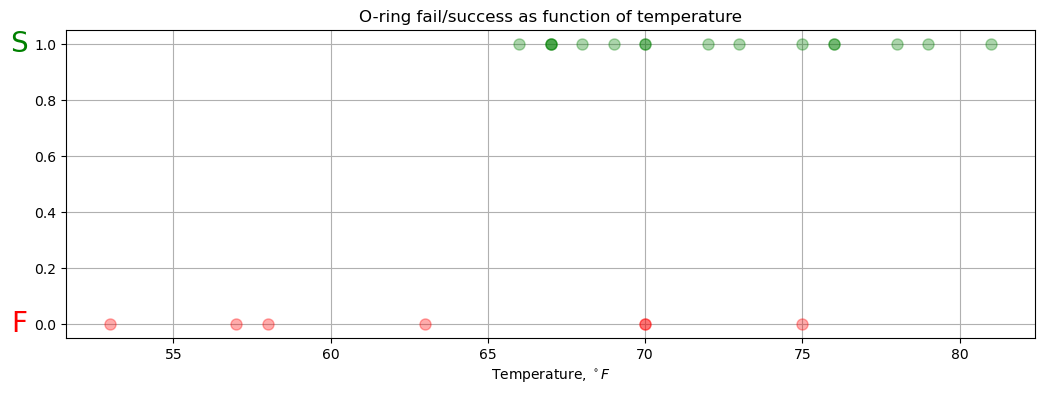

In [3]:
plt.figure(figsize=(12.5, 4))
plt.yticks(np.arange(0,1.01,.2))
plt.plot(S, np.ones(len(S)), 'go',
         F, np.zeros(len(F)), 'ro', alpha=.33, markersize=8)
plt.xlabel("Temperature, ${}^\circ F$")
plt.text(-.04,.93,'S', transform=plt.gca().transAxes, fontsize=20, c='g', ha='right')
plt.text(-.04,.02,'F', transform=plt.gca().transAxes, fontsize=20, c='r', ha='right')
plt.ylim(-.05,1.05)
plt.grid('on')
plt.title('O-ring fail/success as function of temperature');

Note that the transparency alpha=.5 makes visible when points are on top of each other (e.g., there are three success data points for t=67, and two failures and two successes for t=70).

Now define and plot the logistic function:

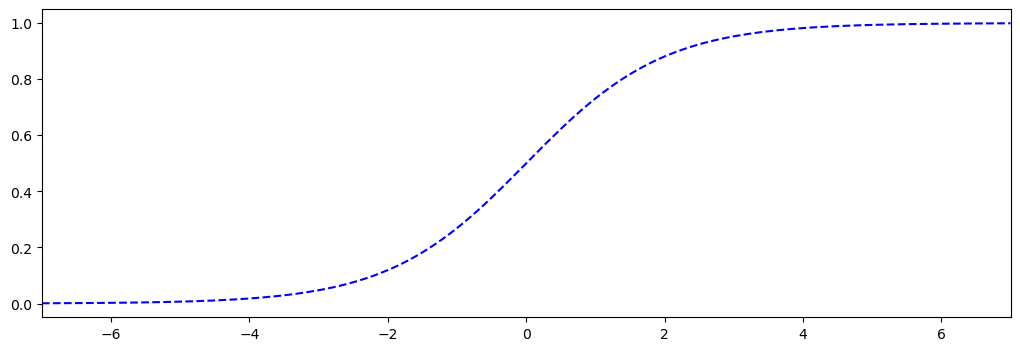

In [4]:
def p(t, a=1., t0=0.): return 1 / (1 + np.exp(-a*(t-t0)))

plt.figure(figsize=(12.5, 4))
plt.xlim(-7,7)
xr=np.arange(-7.,7.1,.1)
plt.plot(xr, p(xr), 'b--');

The object is to find parameters a and t0 for the logistic `p(t,a,t0)` that give the highest overall probability of the data. 

For each value of `t0` and `a`, there's a sigmoid function `p(t,a,t0)`. Mathematically that's $p(t\ |\ t_0, a)$, 
the probability that the O-ring is OK at temperature `t`, given some value of `t0` and `a`.
The probability of a data point is therefore `p(t,a,t0)` if the datapoint is a success (1), and `1 - p(t, t0, a)` if the datapoint is a failure (0).

To calculate the overall probability of the data (for some fixed `t0,a`), take a product of the above probabilities over the 23 data points (7 failures, 16 successes), i.e., 
`(1-p(53, t0, a)) * (1- p(57, t0, a)) * ... * p(79 , t0, a) * p(78 , t0, a)`
(and if a datapoint occurs more than once, it is included multiple times in the product, according to how it occurred each time).
That's the objective function inside the loop for which you're trying to to find the optimal values of `t0` and `a`.
Those values of `t0` and `a` maximize the probability of the data (given the assumption that the probability of failure is given by a sigmoid function in the first place).
Then for those maximum probable values, you will calculate the probability of failure for `t=31`.

[It's usually preferable to calculate the log of something small like a product of probabilities to avoid underflow (though python seems to do ok regardless). The log of the above expression is just the sum of the logs of the terms in the product, so the result would be
`np.log(1-p(F,t0,a)).sum() + np.log(p(S,t0,a)).sum()`
where `F` is an array of values of t with failed o-ring (0), and `S` is an array of values of t with success (1).<br>
Note that `p()` of an array will give a list of probabilities for each value in the array, then `np.log()` will similarly map onto each term on the list, then those values are summed by `.sum()` method of the array.]

Looking at the data, we see that `t0` (where the probability is .5) will be between 50 and 85, and `a` between 0 and 1 (so that the transition region will be spread wider than the above graph).

There are more efficient ways of finding optimal values of parameters
(e.g., one might ordinarily use something like [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
-- see [plot_logistic](http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html), which will be on ps3), but since there are only two parameters in this case it is possible to perform a brute-force search over the 2-dimensional grid of  values of `a in np.arange(.01,1.,.01)` and `t0 in np.arange(50,85.001,.5)`. That would be 100 values of `a` from .01 to 1, and 72 values of `t0` from 50 to 85.

First find the optimal values of `a` and `t0`

In [5]:
#calculates log(prob), using 1-p for fail points

def logprob(a,t0):
   return np.log(p(S, a, t0)).sum() + np.log(1-p(F, a, t0)).sum()

In [6]:
#make a grid over the parameter ranges
ar = np.arange(.01, 1., .01)
t0r = np.arange(50, 85.001, .5)

logprobs = np.array([[logprob(a,t0) for t0 in t0r] for a in ar])

In [7]:
logprobs.size

7029

In [8]:
#find the max, and where
logprobs.max(), np.argwhere(logprobs==logprobs.max())
#  or np.unravel_index(logprobs.argmax(),logprobs.shape)

(-10.161118065421583, array([[23, 30]]))

In [9]:
#occurs at 23,30
print ('max at a={:.3f}, t0={}'.format(ar[23],t0r[30]))

max at a=0.240, t0=65.0


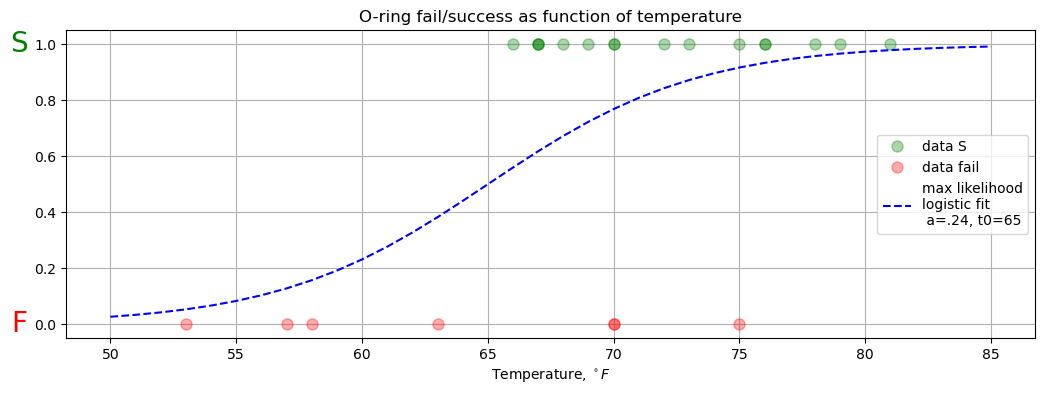

In [10]:
plt.figure(figsize=(12.5, 4))
plt.yticks(np.arange(0, 1.01, .2))
plt.plot(S, np.ones(len(S)), 'go', F, np.zeros(len(F)), 'ro',
         alpha=.33, markersize=8)
plt.ylim(-.05, 1.05)
plt.grid('on')
plt.plot(np.arange(50,86), p(np.arange(50,86), .24, 65), 'b--', label='bye')
plt.legend(['data S', 'data fail', 'max likelihood\nlogistic fit\n a=.24, t0=65'], loc='center right');

plt.xlabel("Temperature, ${}^\circ F$")
plt.text(-.04,.93,'S', transform=plt.gca().transAxes, fontsize=20, c='g', ha='right')
plt.text(-.04,.02,'F', transform=plt.gca().transAxes, fontsize=20, c='r', ha='right')
plt.title('O-ring fail/success as function of temperature');

In [11]:
# actual temperature
print ('probability of failure at t=31 degs F = {:.2%}'.format(1-p(31,.24,65)))

probability of failure at t=31 degs F = 99.97%


In [12]:
p(81,.24,65)

0.9789586529795317

Let's look a bit at the probabilities themselves:

In [13]:
pprobs = np.exp(logprobs) / np.exp(logprobs).sum()  #now consider normalized posterior probs

a_avg = np.average([[a for t0 in t0r] for a in ar], weights=pprobs)  #weighted average
t0_avg = np.average([[t0 for t0 in t0r] for a in ar], weights=pprobs)

print ('a_avg={:.3f},  t0_avg={:.2f}'.format(a_avg, t0_avg))

a_avg=0.236,  t0_avg=63.81


They're peaked fairly strongly in the neighborhood of the maximum:

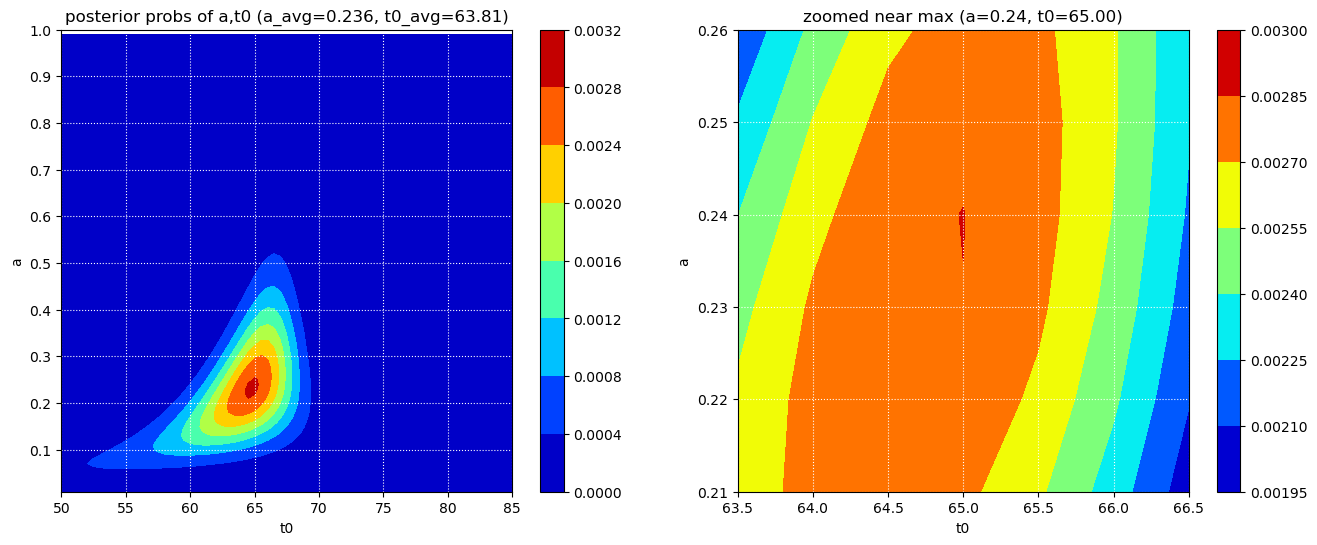

In [14]:
#look directly at the overall probability of the data for all values of t0, a
plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
plt.contourf(t0r, ar, pprobs, cmap='jet')
plt.grid('on', color='w', linestyle='dotted')
plt.title('posterior probs of a,t0 (a_avg={:.3f}, t0_avg={:.2f})'.format(a_avg,t0_avg))
plt.xlabel('t0'), plt.ylabel('a')
plt.yticks(np.arange(.1,1.1,.1));
plt.colorbar()

plt.subplot(1,2,2)
plt.contourf(t0r[27:34], ar[20:26], pprobs[20:26,27:34], cmap='jet')
plt.grid('on', color='w', linestyle='dotted')
plt.title('zoomed near max (a={:.2f}, t0={:.2f})'.format(ar[23], t0r[30]))
plt.xlabel('t0'), plt.ylabel('a')
plt.colorbar();

## How do the contour plots work?

In [15]:
x = np.arange(-5,5,.1)
y = np.arange(-5,5,.1)
xx,yy = np.meshgrid(x,y) # a grid of the x and y values

In [16]:
np.array(xx**2 + yy**2)

array([[50.  , 49.01, 48.04, ..., 47.09, 48.04, 49.01],
       [49.01, 48.02, 47.05, ..., 46.1 , 47.05, 48.02],
       [48.04, 47.05, 46.08, ..., 45.13, 46.08, 47.05],
       ...,
       [47.09, 46.1 , 45.13, ..., 44.18, 45.13, 46.1 ],
       [48.04, 47.05, 46.08, ..., 45.13, 46.08, 47.05],
       [49.01, 48.02, 47.05, ..., 46.1 , 47.05, 48.02]])

In [17]:
z = np.sqrt(xx**2+yy**2)
z.shape

(100, 100)

Alternatively, `meshgrid()` just implements a double loop:

In [18]:
x = np.arange(0,1, .2)
y = np.arange(0,1, .2)

for yt in y:
    print ([(xt,yt) for xt in x])

[(0.0, 0.0), (0.2, 0.0), (0.4, 0.0), (0.6000000000000001, 0.0), (0.8, 0.0)]
[(0.0, 0.2), (0.2, 0.2), (0.4, 0.2), (0.6000000000000001, 0.2), (0.8, 0.2)]
[(0.0, 0.4), (0.2, 0.4), (0.4, 0.4), (0.6000000000000001, 0.4), (0.8, 0.4)]
[(0.0, 0.6000000000000001), (0.2, 0.6000000000000001), (0.4, 0.6000000000000001), (0.6000000000000001, 0.6000000000000001), (0.8, 0.6000000000000001)]
[(0.0, 0.8), (0.2, 0.8), (0.4, 0.8), (0.6000000000000001, 0.8), (0.8, 0.8)]


followed by a `zip()`:

In [19]:
xx, yy = zip(*[(xt,yt) for yt in y for xt in x ])

where `zip()` does what you might guess:

In [20]:
list(zip(*list(zip(range(5), 'abcde'))))

[(0, 1, 2, 3, 4), ('a', 'b', 'c', 'd', 'e')]

In [21]:
plt.contour?

In [22]:
x = np.arange(-5,5,.1)
y = np.arange(-5,5,.1)
xx,yy = np.meshgrid(x,y) # a grid of the x and y values

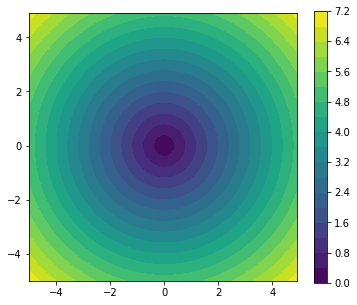

In [23]:
plt.figure(figsize=(6,5))
plt.contourf(x,y,z, levels=20) # try  , cmap ='gray', 'jet', 'seismic'
plt.gca().set_aspect(1)
plt.colorbar();

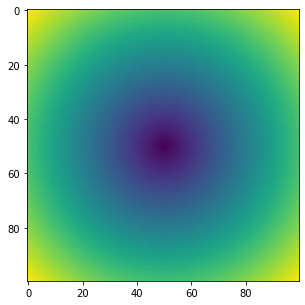

In [24]:
#easier to see what's going on than with full resultion
plt.figure(figsize=(5,5))
plt.imshow(z);

In [25]:
def logit(x): return 1 / (1 + np.exp(-x))

In [26]:
z= logit(xx+2*yy+4)  # x+2*y through zero at y=-x/2

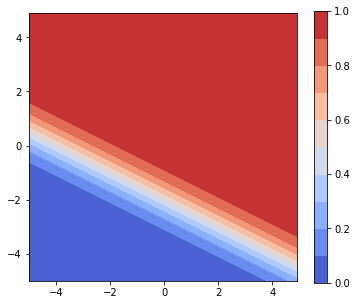

In [27]:
# see decision boundaries
plt.figure(figsize=(6,5))
plt.contourf(x,y,z, levels=10, cmap='coolwarm') # gray, jet, seismic
plt.gca().set_aspect(1)
#plt.xlim(-3,3)
#plt.ylim(-3,3)
plt.colorbar();